In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# population analysis
#How does housing affordability vary across different Canadian cities? 
#Is there a correlation between city population size and average house price?
#How does population density (people per square kilometre) influence housing prices and affordability across Canadian cities?


### population_housing_merged_clean.csv

In [21]:
population_housing_file = Path("population_housing_merged_clean.csv")
house_listing_df = pd.read_csv(population_housing_file,encoding="ISO-8859-1")
house_listing_df.head()

,city,province,abbrev,area_type,pop,pop_density_sq_km,total_dwellings,land_area_sq_km,median_income,lat,lon,address,price,beds,baths
0,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,33 queens road,275000,4,1
1,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,70 julieann place,767500,4,4
2,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,5 ruth avenue,159900,3,1
3,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,11 parliament street,350000,4,3
4,St. John's,Newfoundland and Labrador,NL,large urban,185565,1042.5,86189,178.0,85000,47.4817,-52.7971,84 gil eannes drive,424900,4,3


#### Group data by city to calculate average house prices, population, and income

In [22]:
city_grouped = house_listing_df.groupby('city').agg({
    'price': 'mean',  # Average house price per city
    'pop': 'first',   # Population size per city (assuming it's the same across entries for each city)
    'pop_density_sq_km': 'first',  # Population density per city
    'median_income': 'first'  # Median income per city
}).reset_index()

In [23]:
# Calculate affordability as house price to income ratio
city_grouped['affordability'] = city_grouped['price'] / city_grouped['median_income']


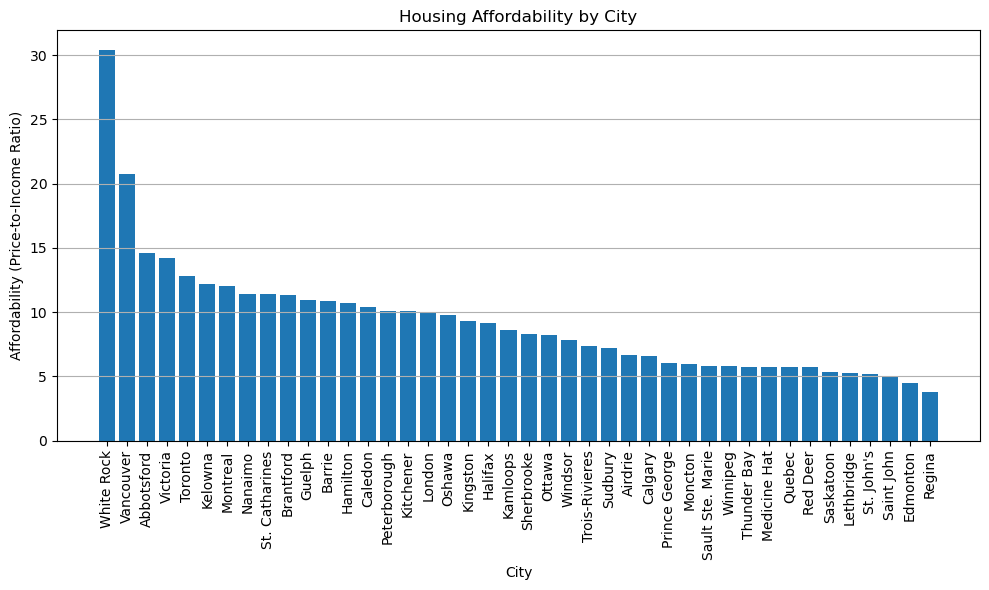

In [24]:
# Sort the cities by affordability in descending order
sorted_affordability = city_grouped.sort_values(by='affordability', ascending=False)

# Create a bar chart with sorted affordability
plt.figure(figsize=(10, 6))
plt.bar(sorted_affordability['city'], sorted_affordability['affordability'])
plt.xticks(rotation=90)
plt.title('Housing Affordability by City')
plt.xlabel('City')
plt.ylabel('Affordability (Price-to-Income Ratio)')
plt.grid(axis='y')  # Add grid lines only on the y-axis
plt.tight_layout()
plt.show()

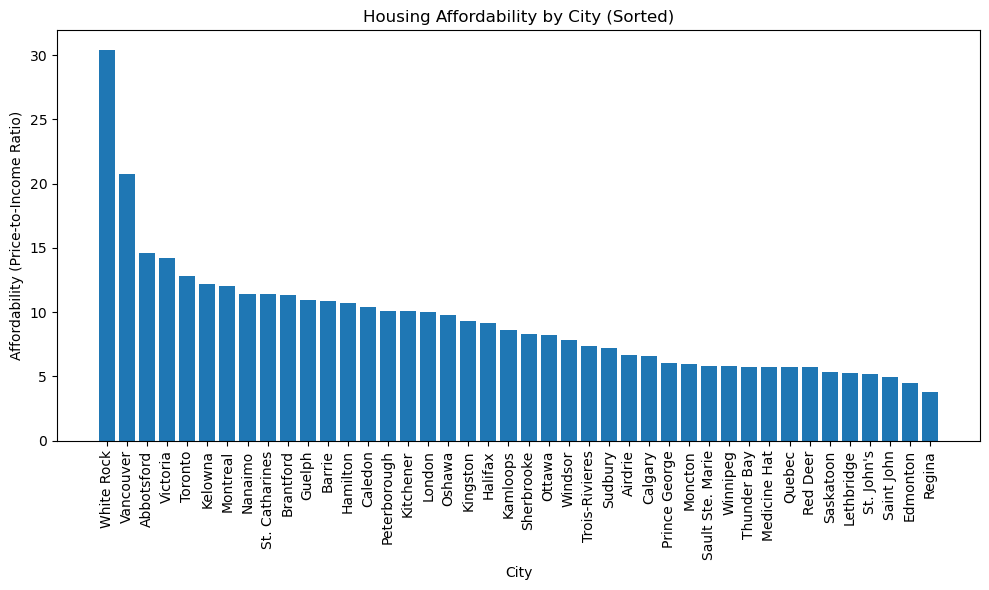

In [15]:
# Sort the cities by affordability in descending order
sorted_affordability = city_grouped.sort_values(by='affordability', ascending=False)

# Create a bar chart with sorted affordability
plt.figure(figsize=(10, 6))
plt.bar(sorted_affordability['city'], sorted_affordability['affordability'])
plt.xticks(rotation=90)
plt.title('Housing Affordability by City (Sorted)')
plt.xlabel('City')
plt.ylabel('Affordability (Price-to-Income Ratio)')
plt.tight_layout()
plt.show()

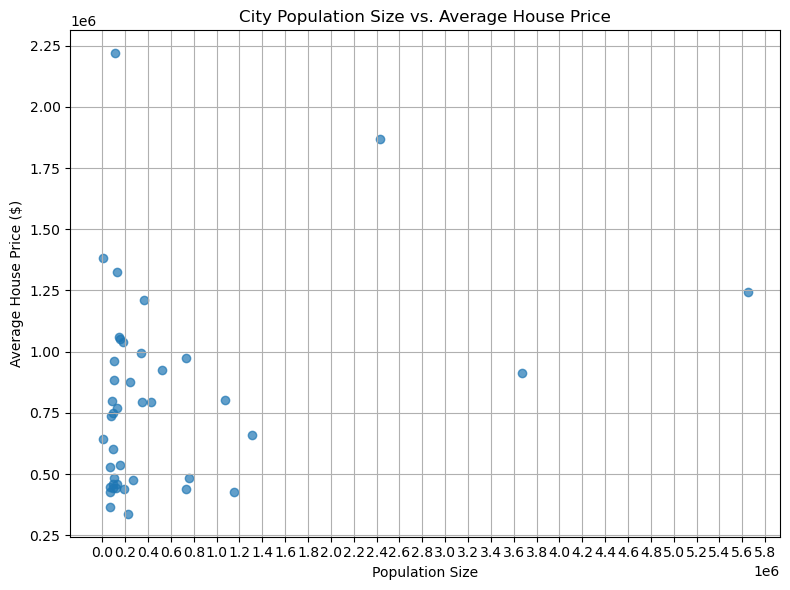

In [35]:

# Define the range for x-axis ticks based on population size
start = city_grouped['pop'].min()  # Start from the minimum population
stop = city_grouped['pop'].max()   # End at the maximum population
step = 200000  # Set the step size (e.g., every 100,000 people)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(city_grouped['pop'], city_grouped['price'], alpha=0.7)
plt.title('City Population Size vs. Average House Price')
plt.xlabel('Population Size')
plt.ylabel('Average House Price ($)')

# Apply custom ticks to the x-axis
plt.xticks(np.arange(0, 6000000, 200000))

# Add grid lines
plt.grid(True)
plt.tight_layout()
plt.show()

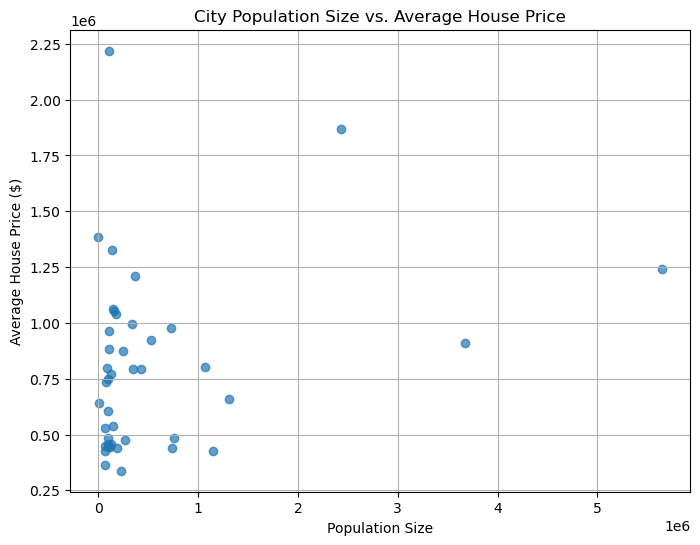

In [9]:
# Plot 2: Scatter plot - City population size vs. Average house price
plt.figure(figsize=(8, 6))
plt.scatter(city_grouped['pop'], city_grouped['price'], alpha=0.7)
plt.title('City Population Size vs. Average House Price')
plt.xlabel('Population Size')
plt.ylabel('Average House Price ($)')
plt.grid(True)
plt.show()

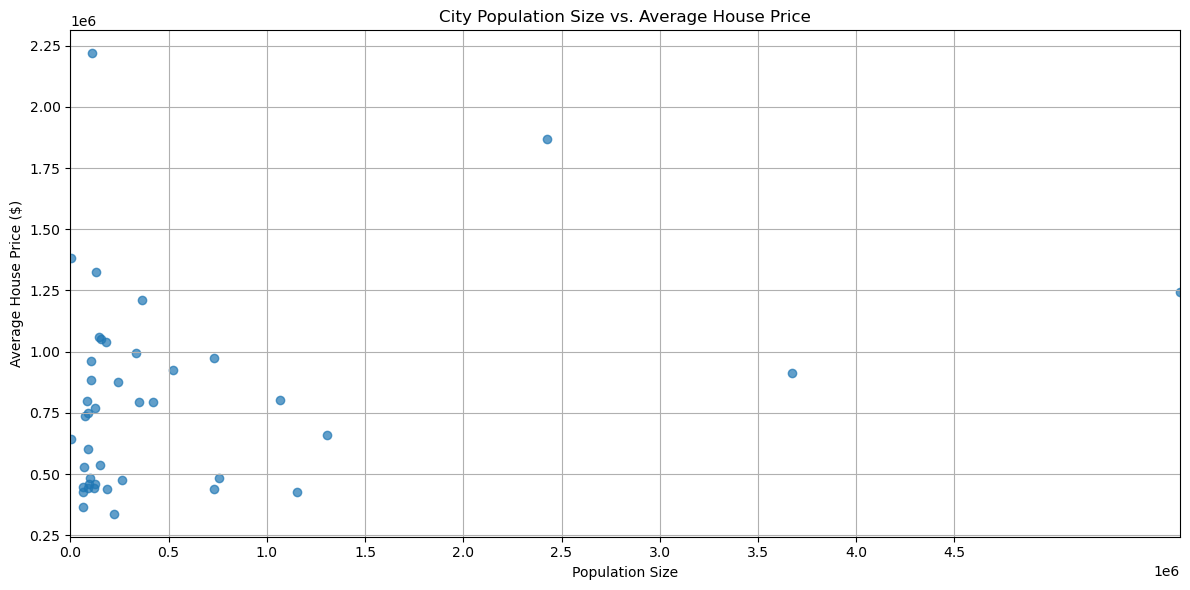

In [52]:
# Plot the scatter plot
plt.figure(figsize=(12,6 ))
plt.scatter(city_grouped['pop'], city_grouped['price'], alpha=0.7)
plt.title('City Population Size vs. Average House Price')
plt.xlabel('Population Size')
plt.ylabel('Average House Price ($)')

# Apply custom ticks to the x-axis
plt.xticks(np.arange(0, 5000000, 500000))  # Custom ticks from 0 to 5 million with a step of 500,000

# Set the x-axis to start from 0
plt.xlim(0, city_grouped['pop'].max())  # Ensures the x-axis starts at 0

# Add grid lines
plt.grid(True)
plt.tight_layout()
plt.show()

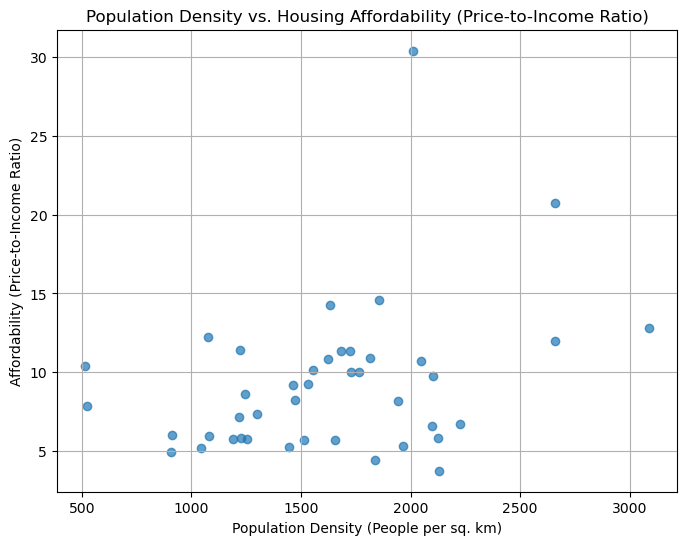

In [10]:
# Plot 3: Scatter plot - Population density vs. Housing affordability (price-to-income ratio)
plt.figure(figsize=(8, 6))
plt.scatter(city_grouped['pop_density_sq_km'], city_grouped['affordability'], alpha=0.7)
plt.title('Population Density vs. Housing Affordability (Price-to-Income Ratio)')
plt.xlabel('Population Density (People per sq. km)')
plt.ylabel('Affordability (Price-to-Income Ratio)')
plt.grid(True)
plt.show()

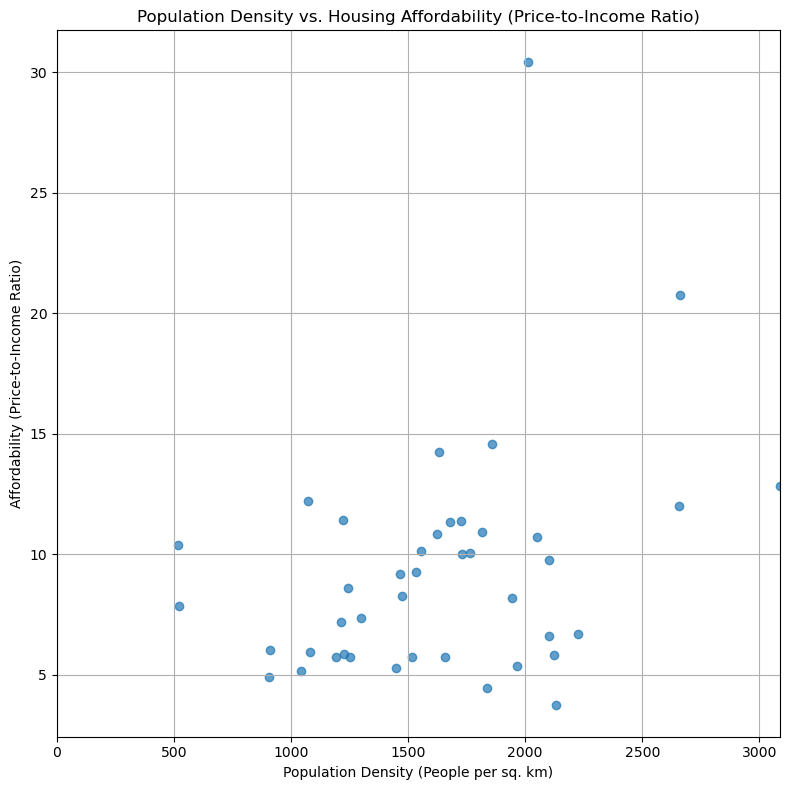

In [41]:
# Plot 3: Scatter plot - Population density vs. Housing affordability (price-to-income ratio)
plt.figure(figsize=(8, 6))
plt.scatter(city_grouped['pop_density_sq_km'], city_grouped['affordability'], alpha=0.7)
plt.title('Population Density vs. Housing Affordability (Price-to-Income Ratio)')
plt.xlabel('Population Density (People per sq. km)')
plt.ylabel('Affordability (Price-to-Income Ratio)')

# Set the x-axis to start from 0
plt.xlim(0, city_grouped['pop_density_sq_km'].max())  # Ensures the x-axis starts at 0

plt.grid(True)
plt.tight_layout()
plt.show()

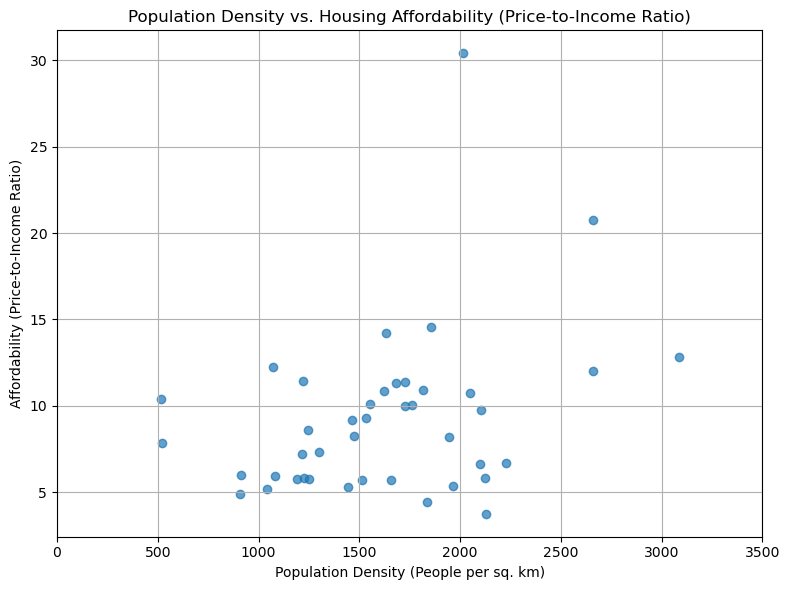

In [42]:
# Plot 3: Scatter plot - Population density vs. Housing affordability (price-to-income ratio)
plt.figure(figsize=(8, 6))
plt.scatter(city_grouped['pop_density_sq_km'], city_grouped['affordability'], alpha=0.7)
plt.title('Population Density vs. Housing Affordability (Price-to-Income Ratio)')
plt.xlabel('Population Density (People per sq. km)')
plt.ylabel('Affordability (Price-to-Income Ratio)')

# Set the x-axis limit from 0 to 3500
plt.xlim(0, 3500)

plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Optional:calculate the correlations
pop_price_corr = city_grouped['pop'].corr(city_grouped['price'])
density_affordability_corr = city_grouped['pop_density_sq_km'].corr(city_grouped['affordability'])

# Print the correlations
print(f"Correlation between population size and average house price: {pop_price_corr}")
print(f"Correlation between population density and affordability: {density_affordability_corr}")

Correlation between population size and average house price: 0.2673579494214151
Correlation between population density and affordability: 0.33826030240638916
